
아래 강의 노트는 [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) 4장을 기반으로 번역 및 편집하여 페이지 구성함  
<img src="https://images-na.ssl-images-amazon.com/images/I/51c1VrgvhVL._SX379_BO1,204,203,200_.jpg" width=20%>

<font color ="blue"> **무단 배포를 금지 합니다.** </font>
***

<!--BOOK_INFORMATION-->

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

# Seaborn을 사용한 시각화

Matplotlib가 유용하고 보편적으로 사용 가능 하지만, 주요 기능에 대한 아쉬움이 남아 있음

- 버전 2.0 이전에는 Matplotlib's의 기본 설정이 최선의 선택이 아니다. 1999년도의 MATLAB을 기반  

- Matplotlib의 API 는 비교적 수준이 낮다. 복잡한 통계 시각화를 할 수 있지만 종종 수많은 상용구 코드가 필요
- Matplotlib 는 Pandas보다 10년 이상 앞서 개발 되었기 때문에 Pandas의 ``DataFrame``과 함께 사용할 수 있게 설계되어 있지 않다.  Pandas의 ``DataFrame``데이터를 시각화 하려면 ``Series``를 추출하고 적절한 형태로 연결해야 하는 경우가 많다. Plot에 DataFrame 레이블을 똑똑하게 사용할 수 있는 플로팅 라이브러리를 가지는 것이 필요함.

이러한 문제를 해결하기 위한 해답이 바로 [Seaborn](http://seaborn.pydata.org/). Seaborn은 적절한 플롯 스타일과 색상 기본값을 제공 하고 일반적인 통계 플롯 유형을 위한 간단한 고차원 함수를 정의하여 Pandas ``DataFrame``이 제공하는 기능과 통합하는 API를 matplotlib를 위에 제공한다.

다양한 시각화에 대한 자료는 아래 링크를 통해서 더 많이 얻을 수 있음

https://seaborn.pydata.org/api.html

## Seaborn vs Matplotlib

Matplotlib의 전형적인 플롯 형식과 색상을 사용해 간단한 무직위 행보 플롯을 만들어보자.

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')  #classic 테마를 사용
%matplotlib inline
import numpy as np
import pandas as pd

무작위 데이터 만들기

In [2]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)  #0부터 10까지 500칸으로 나눔
y = np.cumsum(rng.randn(500, 6), 0)  #누적값  #랜덤 500개, 칼럼 6개 = 6개의 데이터(곡선)을 만듦

간단한 플롯:

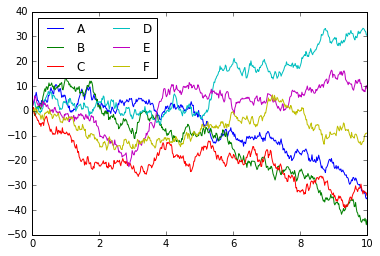

In [3]:
# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');  #matplot으로 하면 범례 등을 모두 직접 설정을 해줘야 함
#seaborn은 matplot에 비해 더 직관적이고 쉬움!

Seaborn으로 작업하는 방법을 살펴보면,Seaborn은  고유의 고차원 플로팅 루틴을 많이 가지고 있지만 Matplotlib 기본 매개변수를 덮어쓰는 것도 가능하기 때문에 간단한  Matplotlib 스크립트를 사용해 훨씬 우수한 결과물 만들기 가능.  
Seaborn's 은 ``set()``메서드를 이용해서 스타일 설정.  
Seaborn ``sns``로 임포트 한다.

In [4]:
import seaborn as sns
sns.set()

아래 두줄은 동일하게 사용 

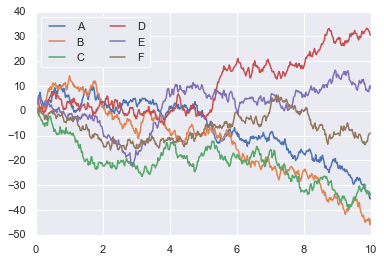

In [5]:
# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');  #seaborn에 matplot 기본 매개변수를 덮어쓰는 것도 가능!

보기에 훨씬 더 좋음

## Seaborn Plots 탐색

Seaborn의 주요 목적은 통계 데이터 탐색과 몇가지 통계 모델 작업에 유용한 다양한 플롯 유형을 생성 할 수 있도록 고차원 명령어를 제공 하는 것이다.

Seaborn에서 사용 할 수 데이터세트와 plot 유형을 몇가지 살펴보자

### 히스토 그램, KDE,  밀도

대체로 통계 데이터 시각화에서 하고자 하는 바는 히스토그램과 변수 결합 분포를 그리는 것이다.

(2000, 2)


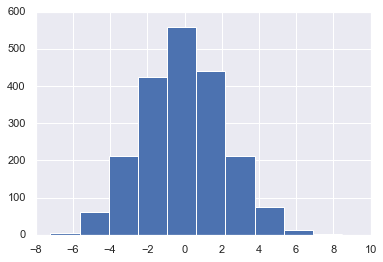

In [6]:
randdata = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
#다변량 정규분포 => 변수가 2개(평균에 대한 벡터(0,0), 공분산([5,2],[2,2]))

print(randdata.shape)  #2000개니깨 2000, x, y가 생기니까 2
import matplotlib.pyplot as plt
plt.hist(randdata[:,0])  #x만 사용해서 히스토그램 그림
plt.show()

<AxesSubplot:ylabel='Count'>

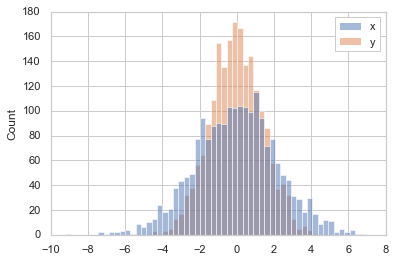

In [45]:
randdata = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
randdata = pd.DataFrame(randdata, columns=['x', 'y'])

sns.histplot(data = randdata)  #seaborn을 이용하면 여러 개의 데이터를 한꺼번에 그릴 수 있음

히스토그램 대신  ``sns.kdeplot``으로 커널 밀도 추정을 사용해 분포의 평활 추정을 얻을 수 있음:

<AxesSubplot:ylabel='Density'>

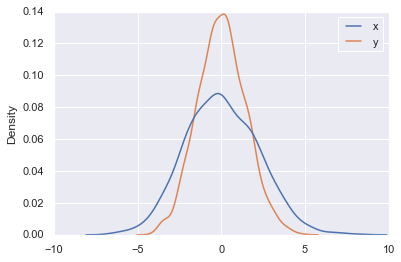

In [8]:
sns.kdeplot(data=randdata)  #위의 히스토그램과 같은데 이건 형태가 선형인 것

히스토그램과 KDE는``distplot``에서 kde옵션을 추가 하여 결합 가능:

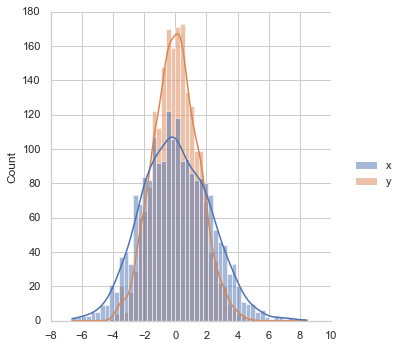

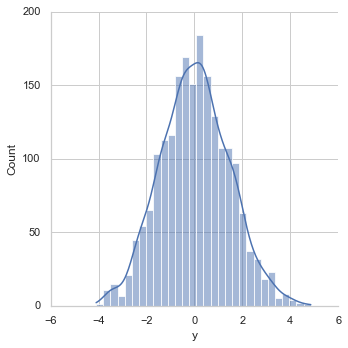

In [44]:
#displot의 종류(kind = 어쩌구)을 정하지 않으면 default는 히스토그램임!
#여기에 다른거를 추가하고싶으면 어쩌구 = True로 하면 두 가지의 그래프가 동시에 그려짐!
sns.displot(data = randdata, kde=True)
sns.displot(randdata['y'], kde=True)  #y만 그림

``jointplot``를 사용하면 결합 분포와 주변 분포를 함께 볼 수 있다 

In [10]:
## 이거는 mac을 사용하는 사람이 쓰는 메시지 나는 안써도 돼
#import ssl

#ssl._create_default_https_context = ssl._create_unverified_context

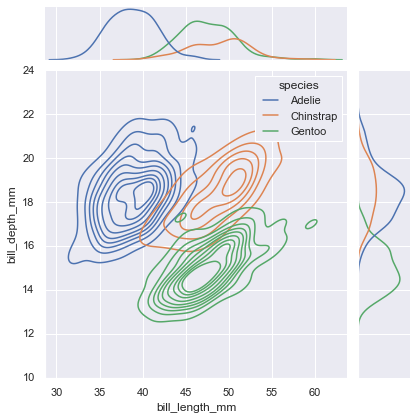

In [11]:
penguins = sns.load_dataset('penguins')  #펭귄 데이터를 가져옴
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm",hue="species", kind="kde")  #부리 길이, 어쩌구 등으로 그림, 종에 따라서
#jointplot: 두 개의 축에 대해 합쳐진 그래프를 그리는 것. kind(종류) = 커널밀도함수
#x축: 부리길이, y축: 부리깊이, 구분: 종, 종류: 커널밀도함수

``sns.jointplot``은 다른 매개변수를 사용하여 다양 하게 표한 가능.
For this plot, we'll set the style to a white background:

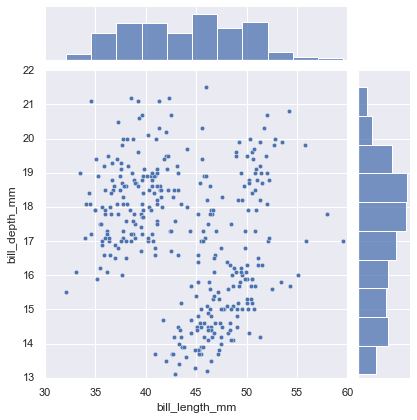

In [12]:
penguins = sns.load_dataset("penguins")
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm",kind="scatter")
#kind의 디폴트는 scatter
#scatter: 흩뿌리기, kde: 커널함수, hist: 모자이크처럼, hex: 벌집처럼
#reg: 흩뿌리기와 실선그래프(회귀), resid: 흩뿌리기와 점선
#  kind="kde"
#kind{ “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” }

### 페어 플롯

큰 차원의 데이터세트에 결합 플롯을 일반화 할때는 결국 pair plot을 사용한다. 이 방식은  다차원의 데이터에서 모든 쌍의 값을 서로 플로팅 하고자 하는 경우 상관관계를 탐색하기에 매우 유용 

붓꽃 종의 꽃잎과 꽃받침 측정치를 나열한 유명한 붓꽃 데이터 세트를 이용

In [13]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


표본 사이의 다차원 관계를 시각화 하는 것은 ``sns.pairplot`` 으로 쉽게 가능:

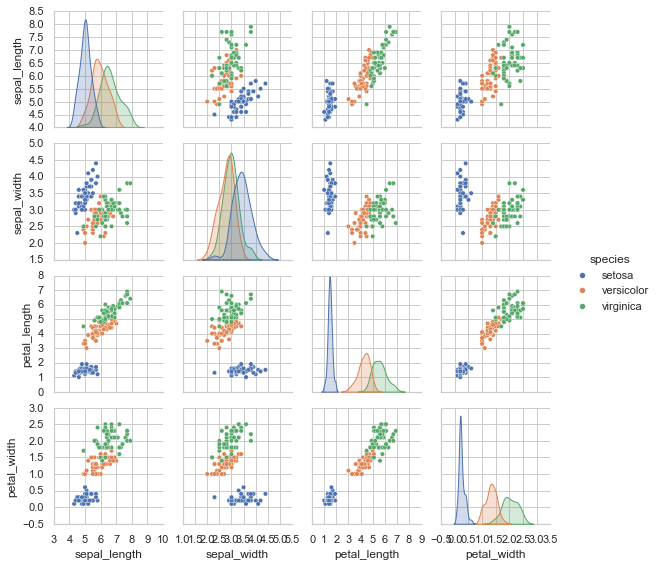

In [46]:
sns.pairplot(data = iris, hue='species', height=2);
#아이리스 데이터를, 종에 따라 나누겠다. 
#pairplot은 모든 조합에 따른 그림을 그려줌!

### 다면 히스토그램

때때로 데이터를 보는 가장 좋은 방법은 부분 집합의 히스토그램을 보는 것이다. Seaborn의 ``FacetGrid``이 부분 히스토 그램을 매우 쉽게 볼 수 있게 해준다.
다양한 지표로 식당 직원이 받는 팁을 보여주는 데이터를 살표보자

In [15]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


     total_bill   tip     sex smoker   day    time  size    tip_pct
0         16.99  1.01  Female     No   Sun  Dinner     2   5.944673
1         10.34  1.66    Male     No   Sun  Dinner     3  16.054159
2         21.01  3.50    Male     No   Sun  Dinner     3  16.658734
3         23.68  3.31    Male     No   Sun  Dinner     2  13.978041
4         24.59  3.61  Female     No   Sun  Dinner     4  14.680765
..          ...   ...     ...    ...   ...     ...   ...        ...
239       29.03  5.92    Male     No   Sat  Dinner     3  20.392697
240       27.18  2.00  Female    Yes   Sat  Dinner     2   7.358352
241       22.67  2.00    Male    Yes   Sat  Dinner     2   8.822232
242       17.82  1.75    Male     No   Sat  Dinner     2   9.820426
243       18.78  3.00  Female     No  Thur  Dinner     2  15.974441

[244 rows x 8 columns]


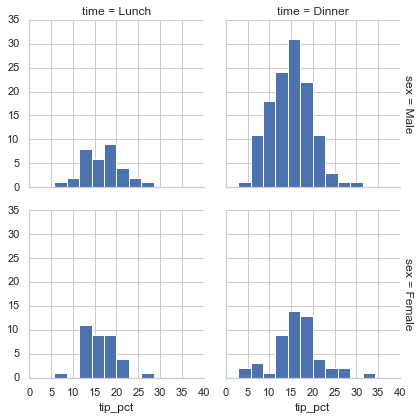

In [47]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']  #퍼센테이지로 하니까 100을 곱함

grid = sns.FacetGrid(data = tips, row="sex", col="time", margin_titles=True)
#margin_titles = False이면 4개의 그래프에 모두 점심남자, 저녁남자 로 모두 이름이 생김, True이면 1행남자, 2행여자로 묶은 이름이 생김
#행, 열을 성별과 시간으로 모든 경우의수(2, 2니까 4개가 나옴)를 그림
print(tips)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));
#히스토그램으로, 퍼센테이지를, x축은 0부터 40까지 15구간으로 나눔

### 요인 플롯
요인 플롯은 여러 종류의 시각화에 매우 유용

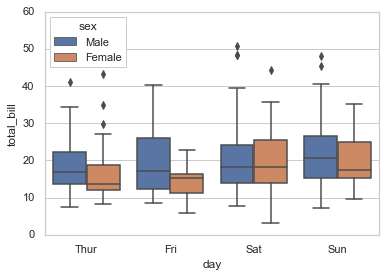

In [17]:
sns.set_theme(style="whitegrid")  #테마 설정
g = sns.boxplot(x="day", y="total_bill", hue="sex", data=tips)
#x축은 날짜, y축은 총금액, 분류는 성별, 데이터는 tips
#hue = 성별이기 때문에 한 항목에 대해 그래프가 2개가 그려지는 것!

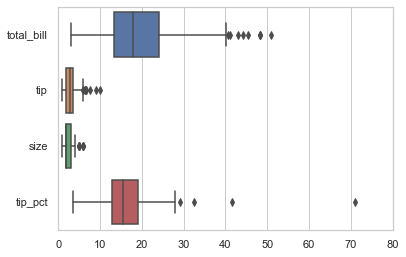

In [18]:
g = sns.boxplot(  data=tips,orient="h")  #이거는 가로로 그려짐(horizental)

### 결합 분포
페어 플롯과 유사하게 관련된 주변 분포와 함께 다양한 데이터세트 간의 결합 분포를 보여주는데 사용:

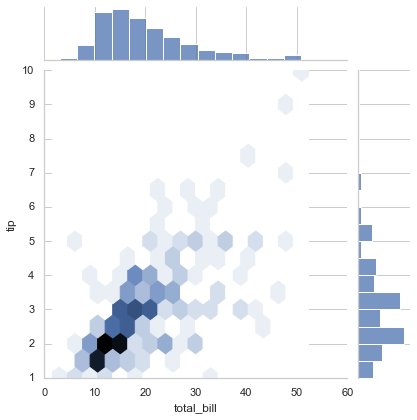

In [19]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind='hex')


결합 플롯은 약간의 자동 커널 밀도추정과 회귀분석을 수행할 수 있음:

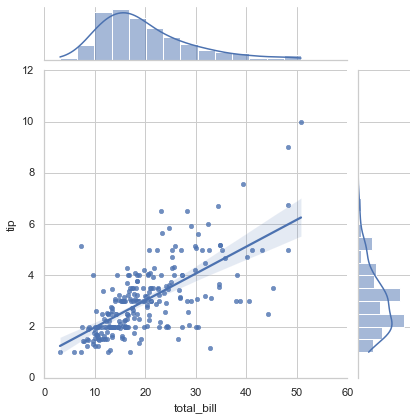

In [20]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind='reg');

### 막대 플롯

시계열은 ``sns.catplot``으로 플로팅 할 수 있음 

In [21]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.tail()

,method,number,orbital_period,mass,distance,year
1030,Transit,1,3.941507,NaN,172.0,2006
1031,Transit,1,2.615864,NaN,148.0,2007
1032,Transit,1,3.191524,NaN,174.0,2007
1033,Transit,1,4.125083,NaN,293.0,2008
1034,Transit,1,4.187757,NaN,260.0,2008


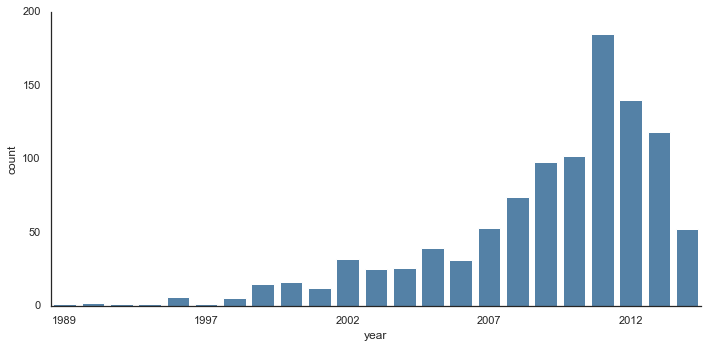

In [22]:
with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=2,  #aspect = 2: 가로가 2, 세로가 1의 비율로
                       kind="count", color='steelblue')
    #kind = count니까 개수를 전부 더한 것
    g.set_xticklabels(step=5)  #x축 라벨을 설정, 연도는 5개씩 띄면서
    
    

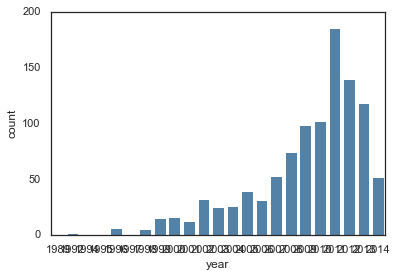

In [23]:
with sns.axes_style('white'):
    #g = sns.catplot(x="year", data=planets, aspect=2,
    #                   kind="count", color='steelblue')
    g = sns.countplot(x="year", data=planets,color='steelblue')  #함수 종류부터 카운트임!!!!
    

행성을 발견한 방법을 살펴봄으로써 더 많은 사실을 알아 낼 수 있음  
아래는 연도 및 유형별로 발견된 행성 수 

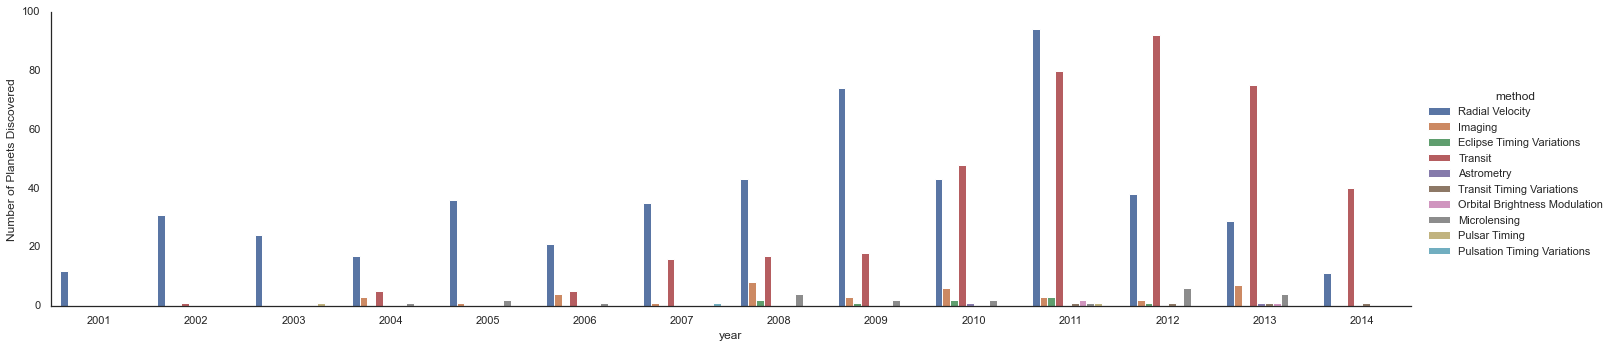

In [24]:
with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))  #2001년부터 2015년까지의 순서로
    #범위는 2001년~2015년
    g.set_ylabels('Number of Planets Discovered')
    #y 라벨 이름 설정

Seaborn을 활용한 플로팅에 더 많은 정보는  [Seaborn documentation](http://seaborn.pydata.org/),와 튜토리얼 [tutorial](http://seaborn.pydata.org/
tutorial.htm), 그리고 갤러리 [Seaborn gallery]를 참고(http://seaborn.pydata.org/examples/index.html).

## 예제: 마라톤 완주 시간 탐색

마라톤 완주 결과를 시각화하고 이해하고자 하는 예제 
웹에서 스크랩한후 개인 식별졍보를 제거한 다음 다운 로드 할 수 있도록 깃허브에 올려둠


In [25]:
#해당 주소에서 파일을 불러옴
!curl -O https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 19  836k   19  160k    0     0   160k      0  0:00:05 --:--:--  0:00:05  189k
100  836k  100  836k    0     0   836k      0  0:00:01  0:00:01 --:--:--  787k


In [26]:
import pandas as pd
data = pd.read_csv('marathon-data.csv')
data.head()
#split은 마라톤의 중간지점 통과 시간(21km)

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


기본적으로 Pandas는 시간 열을 파이썬 문자열(object)로 적재한다. :

In [27]:
data.dtypes  #나이만 숫자, 나머지는 문자열 시간은 중간에 콜론(:)이 있으니까 문자열임!

age        int64
gender    object
split     object
final     object
dtype: object

시간 데이터 변환기를 제공해 object 타입을 시간 데이터로 변환 :

In [28]:
import datetime

def convert_time(s):
    h, m, s = map(int, s.split(':'))  #:을 기준으로 문자를 잘라 int로 바꿔 mapping함
    return datetime.timedelta(hours=h, minutes=m, seconds=s)  #위에서 자른 각각의 시, 분, 초를 시간으로써 반환

data = pd.read_csv('marathon-data.csv',
                   converters={'split':convert_time, 'final':convert_time})  #중간지점과 끝낸 시간의 값(value)을 함수의 리턴값으로 바꿈
data.head()

,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59


In [29]:
data.dtypes  #원본 시간은 문자열 형태, 함수의 리턴값으로 바꿔줌으로써 데이터타입은 시간으로 바뀜)

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

Seaborn플로팅을 목적으로 시간을 초로 제공 하는 열을 추가:

In [30]:
data['split_sec'] = data['split'] / np.timedelta64(1, 's')  #시간을 초로 바꾼(0시간0분0초를 0000초로 바꿈) 데이터를 열에 추가
data['final_sec'] = data['final'] / np.timedelta64(1, 's')  #데이터의 시간을 1초로 나눠라 => 1초로 나누기 위해 시간을 초로 바꿈 => 0000초가 되는 것!
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0


이 데이터가 어떻게 보이는지 확인하기 위해 데이터에  ``jointplot``를 플로팅:

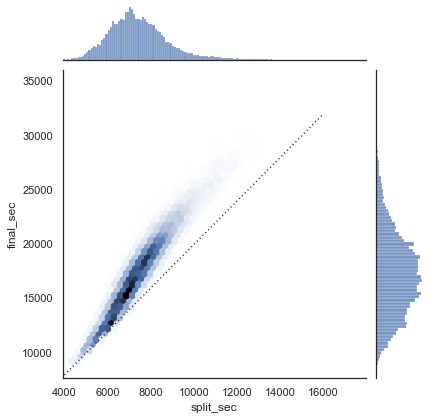

In [31]:
with sns.axes_style('white'):
    g = sns.jointplot(x="split_sec", y="final_sec", data=data, kind='hex')  #벌집
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')  #x축 범위는 4천~16천, y축 범위는 8천~32천, 검은색 점선
    #정속도로 균일하게 갔을 때 점선
    #실제로는 뒤로 갈수록 힘이 빠져 속도가 줄어듦 = 그래프

점선은 완벽하게 일정한 속도로 마라톤을 달리는 경우에 시간이 어디에 기록되는지 보여준다. 예상했겠지만, 위에 놓은 분포를 보면 대부분의 사람이 마라톤 코스가 진행되면서 속도가 줄어드는 것을 알 수 있다. 경쟁적으로 달리는 사람이라면 정반대 방식을 따르는 사람들을 네거티브 스플릿으로 달린다고 하는 것을 알 수 있다.

데이터에 각 주자가 네거티브 스플릿 주자인지 또는 포지티프 스플릿 주자인지 정도를 측정하는 스플릿 정도 열을 만들어 보자.  

이 스플릿 차이가 0보다 작은 사람은 그 수치 만큼 네거티브 스필릿으로 달린다고 볼 수 있음. 이 스플릿 정도를 가지고 분포도를 그려보자.:


** 참고 

- 이븐 스플릿 : 고른 페이스 
- 네거티브 스플릿 : 전반부보다 빠르게 후반부를 달리게하는 것을 의미합니다. 그것은 수영과 같은 다른 스포츠뿐만 아니라 달리기를 위한 페이싱 전술

In [32]:
# 네거티브 스플릿 제대로 이해해라!!! 9주차 3번째영상 20분쯤
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
#frac가 양수다 = 후반부의 소요시간이 더 길다 = 포지티브 스플릿(힘빠짐)
#frac가 0이다 = 후반부와 초반부의 시간이 같다 = 이븐 스플릿(체력 조절 일정)
#frac가 음수다 = 후반부의 소요시간이 더 짧다 = 네거티브 스플릿(후반 스퍼트)
data.head()
#frac가 음수 = 후반부에 빨리 달림, 양수 = 후반부에 힘빠져서 느리게 달림

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842


Where this split difference is less than zero, the person negative-split the race by that fraction.
Let's do a distribution plot of this split fraction:

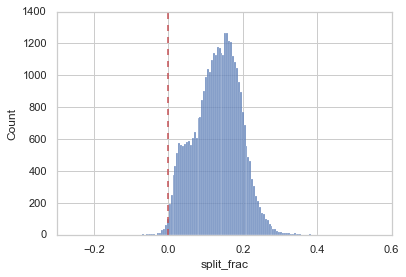

In [33]:
sns.histplot(data['split_frac'], kde=False);  #커널밀도함수는 그리지 않겠다
plt.axvline(0, color="r", linestyle="--");  #세로축 그리기, x = 0 지점에, 빨간색, 점선
# 그래프를 보니 대부분의 사람들은 후반부에 힘이 빠져서 포지티브 스플릿으로 달렸네

In [34]:
print(sum(data.split_frac < 0))  #251명의 사람만 후반부에 빨리 달림  #네거티브 스플릿인 사람은 251명임
print(sum(data.split_frac == 0))  #이븐 스플릿인 사람
sum(data.split_frac > 0)  #포지티브 스플릿인 사람 = 힘 빠진 사람

251
4


36995

40,000 명의 참가자 중에서 250명만 네거티브 스플릿으로 달림.

스플릿 정도와 다른 변수들 사이에 상관관계가 있는지 알아보자. 이를 위해 이 모든 상관관계 플롯을 그려주는 pairgrid 사용:

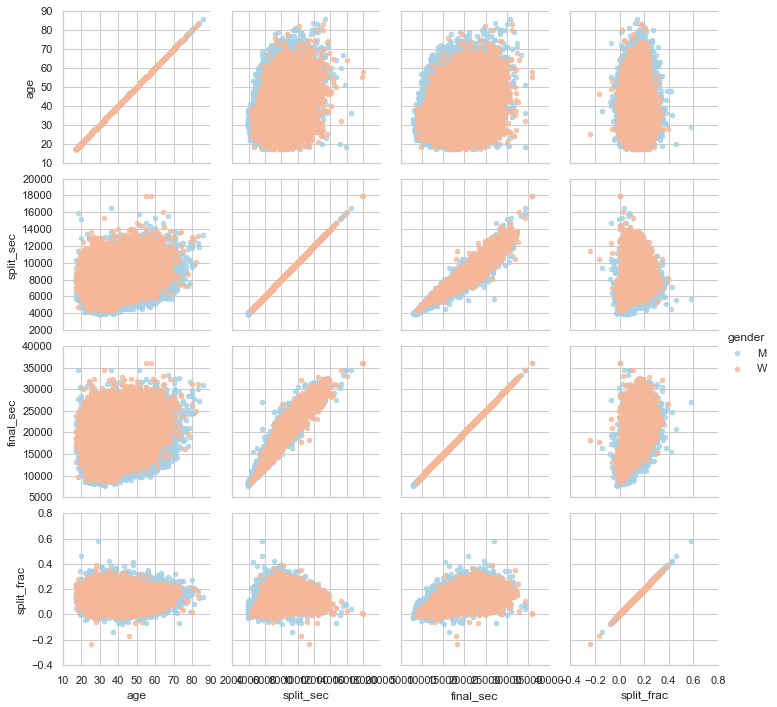

In [35]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'],  #변수는 나이, 중간지점, 끝지점, 페이스조절
                 hue='gender', palette='RdBu_r')  #성별로 나누기, 팔레트(테마)설정
#나이, 중간지점시간, 전체시간, 스플릿비율, 구분은 성별
#원같이 생김 = x와 y의 상관관계가 적다. 직선같이 생김 = x와 y긔 상관관계가 크다
g.map(plt.scatter, alpha=0.8)  #투명도 0.8(1에 가까울수록 진함)  #map 함수를 통해 형태와 투명도를 합침(한 번에 설정)
g.add_legend();  #범례 표현

스플릿 정도가 나이와는 딱기 상관관계가 없지만 완주 시간과는 상관관계가 있어 보임. 

남자와 여자의 차이에 대한 두 그룹에 대한 스플릿 정도에 대한 히스토 그램을 보자

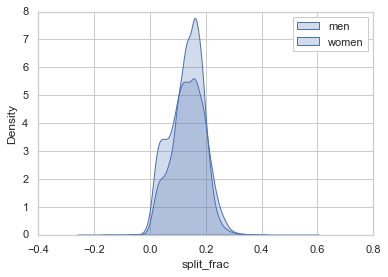

In [36]:
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', shade=True)  #shade = False이면 선만 그려짐(면적을 색칠하지 않음)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', shade=True)  #frac을 여자의 데이터만, 라벨은 woman, 면적 색칠함
plt.xlabel('split_frac');  #x라벨 이름 설정
plt.legend()  #범례 표현

여기서 흥미로운 것은 이븐 스플릿에 달리는 사람은 여성보다 남성이 훨씬 많다는 점.

이 분포를 나이의 함수로 살펴보자.
분포를 비교하기 위해서 바이올린 플롯을 사용하는 것이 좋다

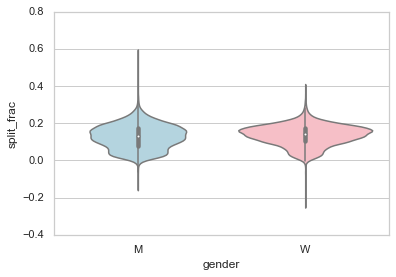

In [37]:
sns.violinplot(x="gender", y="split_frac", data=data,  #바이올린 그래프, x축 성별, y축 frac
               palette=["lightblue", "lightpink"]);  #색상은 순서대로 하늘색, 연분홍색 사용
#남자 폭이 좁음 = even(속도 일정)으로 달리는 사람이 많음(포지티브와 네거티브의 차가 적다)
#여자 폭 넓음 = 여자는 일정속도가 적다(포지티브와 네거티브가 넓게 분포함)

조금더 깊이 들어가 나이 함수를 이 바이올린 프롯으로 비교해보자. 먼저 배열에 각 사람의 나이를 10살 단위로 지정하는 새열을 만들었다.

In [38]:
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))  #10대, 20대로 쓰기 위해 나이를 10으로 나눈 몫 * 10을 데이터로 열 추가
#나이를 10대, 20대 ...로 나눔
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097,30
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842,30


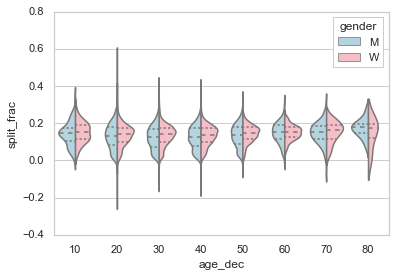

In [39]:
men = (data.gender == 'M')
women = (data.gender == 'W')

with sns.axes_style(style=None):
    sns.violinplot(x="age_dec", y="split_frac", hue="gender", data=data,  #x축 나이, y축 frac, 구분 성별(바이올린 반쪼가리)
                   split=True, inner="quartile",  #split = True이기 때문에 바이올린 반쪼가리, False이면 각각의 바이올린임
                   #바이올린 내부를 quartile: 25%, 50%, 75%의 지점을 점선으로 표시해줌
                   palette=["lightblue", "lightpink"]);  #색상은 순서대로 하늘색, 연분홍색

이 플롯을 보면 남성과 여성의 분포가 어디서 달라지는지 알 수 있다. 20대와 50대에서 남성의 스플릿 분포가 여성의 같은 연령대의 여성과 비교를 했을 때 낮은 스플릿에서 밀도가 확인이 더 높음을 볼 수 있음.

놀랍게도 80대 여성으니 스플릿 시간에서 모든 사람을 능가 하는 것처럼 보임 아마도 그 범위에 해당 하는 주자가 몇 안되어서 적은 양의 데이터로 분포를 추정했기 때문일 것으로 추정..:

In [40]:
(data.age > 80).sum()  #80대 이상인 사람수

7

네거티브 스플릿으로 달리는 남성으로 돌아가면 ``regplot``을 이용해 선형 회귀모형을 자동으로 적합 시킬 수 있다.:

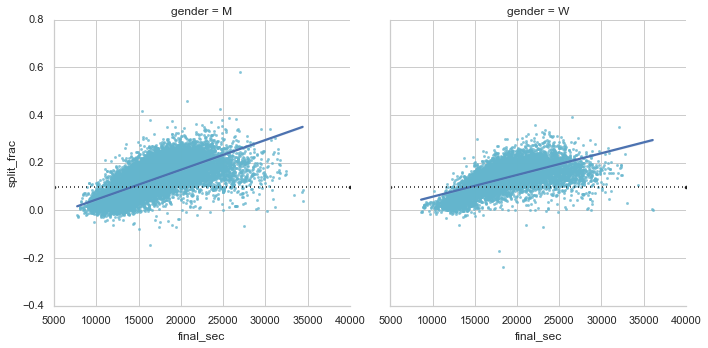

In [41]:
g = sns.lmplot(x='final_sec', y='split_frac', col='gender', data=data,  #x축 끝낸시간, y축 frac, 열은 성별
               markers=".", scatter_kws=dict(color='c'))  #작은 점으로 찍기, 왜 dict인지는 모르겠어.. 약어가 c인 색으로 설정(하늘색 점)
#implot 함수는 데이터를 점찍어주고 해당 데이터들의 회귀 직선을 그려줌(jointplot의 kind = reg 이거랑 같은 것 같음)
g.map(plt.axhline, y=0.1, color="k", ls=":");  #가로축 그림, y좌표는 0.1, 검은색, 점선으로 그림